# Import Library

In [78]:
# Library umum
import pandas as pd
import numpy as np
import datetime as dt
import re
import string
import joblib

# Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# NLP
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import download as nltk_download
nltk_download('punkt')
nltk_download('stopwords')
nltk_download('wordnet')
nltk_download('punkt_tab')

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Scikit Learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Deep Learning
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, LSTM, Dense, Dropout, SpatialDropout1D,
    Conv1D, GlobalMaxPooling1D, Bidirectional, MaxPooling1D,
    Flatten, GRU, SimpleRNN
)
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Pengambilan Data
import requests
import csv
from io import StringIO


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# Data Loading

In [79]:
!gdown 1rgCSoYPNBCD-WbwKRaQ3ZcjdzdG8IHFR

Downloading...
From: https://drive.google.com/uc?id=1rgCSoYPNBCD-WbwKRaQ3ZcjdzdG8IHFR
To: /content/Ulasan_Spotify_30.csv
100% 7.94M/7.94M [00:00<00:00, 201MB/s]


In [80]:
# cek dataset
ulasan = pd.read_csv('Ulasan_Spotify_30.csv')

In [81]:
ulasan.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,681b2813-cf89-4804-8c53-1a726aafdf74,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,seru banget apk nya bagus lagi,4,0,9.0.28.630,2025-04-08 05:12:59,NaN,NaN,9.0.28.630
1,c745602b-9ef9-444a-923b-862e9ce95993,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,TOP aplikasi..bikin puaaaas cari model music ape aje ada...thanks 🙏🙏🙏Bravo spotify,5,0,9.0.32.624,2025-04-08 04:59:44,NaN,NaN,9.0.32.624
2,73cc114c-5534-44ca-b9ff-006bcc364a9f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,mantap,5,0,9.0.32.624,2025-04-08 04:58:29,NaN,NaN,9.0.32.624
3,05af091e-c213-4cca-8d9d-a8721290fa62,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,good,5,0,9.0.32.624,2025-04-08 04:54:48,NaN,NaN,9.0.32.624
4,0472e4d0-c500-40ff-89f8-6cf537828191,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,lengkap. liriknya di lengkapi semua,5,0,9.0.32.624,2025-04-08 04:53:06,NaN,NaN,9.0.32.624


**Insight Data Loading :**
- Dataset diatas adalah hasil scraping dari data ulasan aplikasi Spotify di play store
- Dataset memiliki data ulasan sebanyak 30.000 data ulasan, yang diambil dari apk Sportify di Google Playstore
- Memiliki fitur awal sebanyak 11 fitur

**Keterangan fitur:**

---

| No | Nama Kolom               | Keterangan                                                                 |
|----|--------------------------|----------------------------------------------------------------------------|
| 1  | `reviewId`               | ID unik untuk masing-masing ulasan                                        |
| 2  | `userName`               | Nama pengguna yang memberikan ulasan                                      |
| 3  | `userImage`              | URL foto profil pengguna (gambar akun)                                    |
| 4  | `content`                | Isi dari ulasan yang ditulis pengguna                                     |
| 5  | `score`                  | Skor/rating yang diberikan (1-5)                                          |
| 6  | `thumbsUpCount`          | Jumlah pengguna lain yang memberi "like" atau setuju dengan ulasan tersebut |
| 7  | `reviewCreatedVersion`  | Versi aplikasi saat ulasan ditulis (tidak semua pengguna menyertakan ini) |
| 8  | `at`                     | Tanggal dan waktu ulasan dibuat                                           |
| 9  | `replyContent`           | Balasan dari developer aplikasi (jika ada)                                |
| 10 | `repliedAt`              | Tanggal dan waktu balasan dari developer                                  |
| 11 | `appVersion`             | Versi aplikasi yang digunakan oleh pengguna saat memberi ulasan           |


# Data Preprocessing Cleaning

In [82]:
# melihat informasi dataset
ulasan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              30000 non-null  object 
 1   userName              30000 non-null  object 
 2   userImage             30000 non-null  object 
 3   content               30000 non-null  object 
 4   score                 30000 non-null  int64  
 5   thumbsUpCount         30000 non-null  int64  
 6   reviewCreatedVersion  21404 non-null  object 
 7   at                    30000 non-null  object 
 8   replyContent          0 non-null      float64
 9   repliedAt             0 non-null      float64
 10  appVersion            21404 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 2.5+ MB


In [83]:
# hapus missing value dan data duplikat
ulasan = ulasan.dropna(subset=['content'])
ulasan = ulasan.drop_duplicates()
print("Jumlah data setelah menghapus duplikat:", len(ulasan))

Jumlah data setelah menghapus duplikat: 30000


dalam melakukan preprocessing dan clean data ini, saya hanya menggunakan kolom content saja agar lebih fokus hingga pemodelan

# Text Preprocessing

In [84]:
# Fungsi untuk membersihkan teks dari berbagai elemen yang tidak dibutuhkan
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)              # Menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text)              # Menghapus hashtag
    text = re.sub(r"http\S+", '', text)                    # Menghapus link/URL
    text = re.sub(r'[0-9]+', '', text)                     # Menghapus angka
    text = re.sub(r'[^\w\s]', '', text)                    # Menghapus karakter non-alphanumeric kecuali spasi
    text = text.replace('\n', ' ')                         # Mengganti newline dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation))  # Menghapus tanda baca
    text = text.strip(' ')                                 # Menghapus spasi di awal dan akhir
    return text

# Fungsi untuk mengubah semua huruf menjadi huruf kecil
def casefoldingText(text):
    text = text.lower()
    return text

# Fungsi untuk memecah teks menjadi token/kata-kata
def tokenizingText(text):
    text = word_tokenize(text)
    return text

# Fungsi untuk menghapus kata-kata yang termasuk stopwords (baik Bahasa Indonesia maupun Inggris)
def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))     # Stopwords Bahasa Indonesia
    listStopwords1 = set(stopwords.words('english'))       # Stopwords Bahasa Inggris
    listStopwords.update(listStopwords1)                   # Gabungkan keduanya
    # Tambahan stopwords tidak baku atau informal
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])

    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)                           # Menyimpan kata yang bukan stopword
    text = filtered
    return text

# Fungsi untuk melakukan stemming (mengembalikan kata ke bentuk dasarnya)
def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()                                   # Memecah kalimat menjadi kata-kata

    stemmed_words = [stemmer.stem(word) for word in words] # Stemming setiap kata

    stemmed_text = ' '.join(stemmed_words)                 # Menggabungkan kembali kata-kata
    return stemmed_text

# Fungsi untuk mengubah list kata menjadi kalimat (string)
def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence


In [85]:
slangwords = {
    "gk": "tidak",
    "ga": "tidak",
    "gak": "tidak",
    "nggak": "tidak",
    "tdk": "tidak",
    "gabisa": "tidak bisa",
    "ngabisa": "tidak bisa",
    "si": "di",
    "bgt": "banget",
    "bangett": "banget",
    "bangettt": "banget",
    "bikin": "membuat",
    "dgn": "dengan",
    "sm": "sama",
    "jg": "juga",
    "aj": "saja",
    "aja": "saja",
    "udh": "sudah",
    "blm": "belum",
    "dr": "dari",
    "klo": "kalau",
    "kl": "kalau",
    "tp": "tapi",
    "tpi": "tapi",
    "trs": "terus",
    "nya": "",
    "banget": "sekali",
    "enk": "enak",
    "yg": "yang",
    "knp": "kenapa",
    "karna": "karena",
    "apk": "aplikasi",
    "memeutar": "memutar",
    "spotipi": "spotify",
    "pokoke": "pokoknya",
    "bgs": "bagus",
    "bgus": "bagus",
    "bagu": "bagus",
    "bagusss": "bagus",
    "bagussss": "bagus",
    "dehh": "deh",
    "cobaa": "coba",
    "kalo": "kalau",
    "lagunya": "lagu",
    "dengerin": "mendengarkan",
    "so": "",
    "far": "",
    "good": "bagus",
    "makasih": "terima kasih",
    "makasi": "terima kasih",
    "yanyi": "nyanyi",
    "dwnger": "dengar",
    "ad": "ada",
    "ko": "kok",
    "ni": "ini",
    "smua": "semua",
    "lo": "kamu",
    "gw": "saya",
    "sy": "saya",
    "km": "kamu",
    "ntr": "nanti",
    "pls": "tolong",
    "jd": "jadi"
    }
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [86]:
# membuat nama dataframe baru dan menampilkan data yang belum di bersihkan
clean_df = ulasan
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,681b2813-cf89-4804-8c53-1a726aafdf74,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,seru banget apk nya bagus lagi,4,0,9.0.28.630,2025-04-08 05:12:59,NaN,NaN,9.0.28.630
1,c745602b-9ef9-444a-923b-862e9ce95993,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,TOP aplikasi..bikin puaaaas cari model music ape aje ada...thanks 🙏🙏🙏Bravo spotify,5,0,9.0.32.624,2025-04-08 04:59:44,NaN,NaN,9.0.32.624
2,73cc114c-5534-44ca-b9ff-006bcc364a9f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,mantap,5,0,9.0.32.624,2025-04-08 04:58:29,NaN,NaN,9.0.32.624
3,05af091e-c213-4cca-8d9d-a8721290fa62,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,good,5,0,9.0.32.624,2025-04-08 04:54:48,NaN,NaN,9.0.32.624
4,0472e4d0-c500-40ff-89f8-6cf537828191,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,lengkap. liriknya di lengkapi semua,5,0,9.0.32.624,2025-04-08 04:53:06,NaN,NaN,9.0.32.624


In [87]:
# memberishkan teks dan simpan ke 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# ubah huruf menjadi kecil (lowertext) dan simpan ke 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# menganti kata slang dan simpan ke 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# melakukan tokeniz dan simpan ke 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# hapus kata  dan simpan ke 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# gabung token menjadi kalimat dan simpan ke 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [88]:
# menampilkan data setelah melalui preprocessing text
clean_df[['content', 'text_akhir']].head(5)


,content,text_akhir
0,seru banget apk nya bagus lagi,seru aplikasi bagus
1,TOP aplikasi..bikin puaaaas cari model music ape aje ada...thanks 🙏🙏🙏Bravo spotify,top aplikasibikin puaaaas cari model music ape aje adathanks bravo spotify
2,mantap,mantap
3,good,bagus
4,lengkap. liriknya di lengkapi semua,lengkap liriknya lengkapi


**Insight :**

Preprocessing text dilakukan dengan cleaning text, casefolding, tokenizing, filtering, stemming, dan lainnya. Dengan melakukan proses text preprocessing dapat digunakan untuk memproses dan memepersiapkan teks sebelum melakukan analisis sentimen



# Labelling

In [89]:
# unduh lexion positif dan negatif dari github
# membaca data kamus posiftif
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
reader = csv.reader(StringIO(response.text), delimiter=',')
for row in reader:
    lexicon_positive[row[0]] = int(row[1])

# membaca data kamus negatif
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
reader = csv.reader(StringIO(response.text), delimiter=',')
for row in reader:
    lexicon_negative[row[0]] = int(row[1])

In [90]:
# menggunakan fungsi untuk polaritas sentimen dari Spotify
def sentiment_analysis_lexicon_indonesia(text):
    score = 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''

    if (score >= 0):
        polarity = 'positive'
    elif (score < -7 ):
        polarity = 'negative'
    else:
        polarity = 'neutral'

    return score, polarity

clean_df[['polarity_score', 'polarity']] = clean_df['text_stopword'].apply(lambda x: pd.Series(sentiment_analysis_lexicon_indonesia(x)))

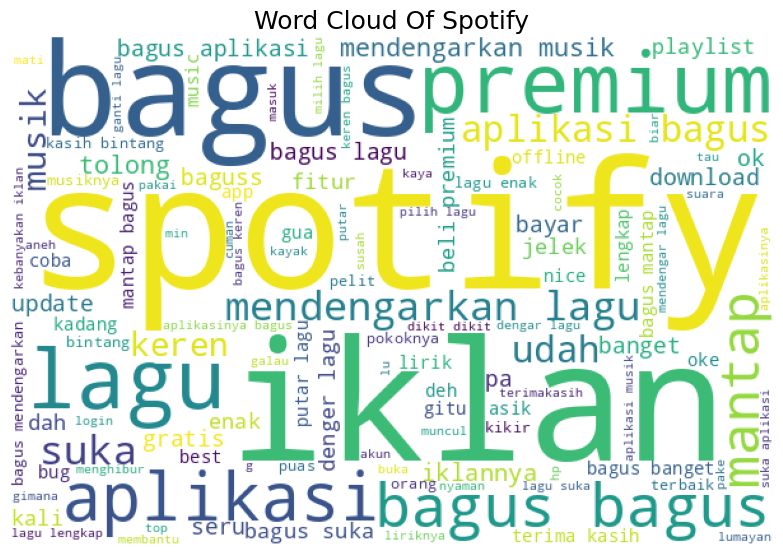

In [91]:
# melakukan eksplorasi label dengan wordcloud
# melihat wordcloud secara menyeluruh

list_words = ''

for spotify in clean_df['text_stopword']:
    for word in spotify:
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud Of Spotify', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()


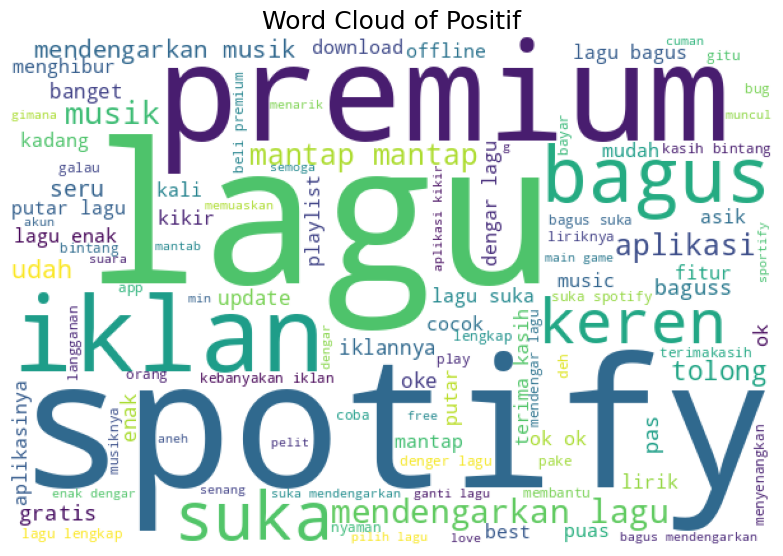

In [92]:
# melihat worldcloud positif
# Membuat dataframe untuk wordcloud positif
pd.set_option('display.max_colwidth', 3000)

positif = clean_df[clean_df['polarity'] == 'positive']
positif = positif[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
positif = positif.sort_values(by='polarity_score', ascending=False)
positif = positif.reset_index(drop=True)
positif.index += 1

# Menampilkan wordcloud untuk label positif
list_words = ''

for spotify in positif['text_stopword']:
    for word in spotify:
        # Menambahkan kata ke dalam 'list_words'.
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Positif', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')

plt.show()

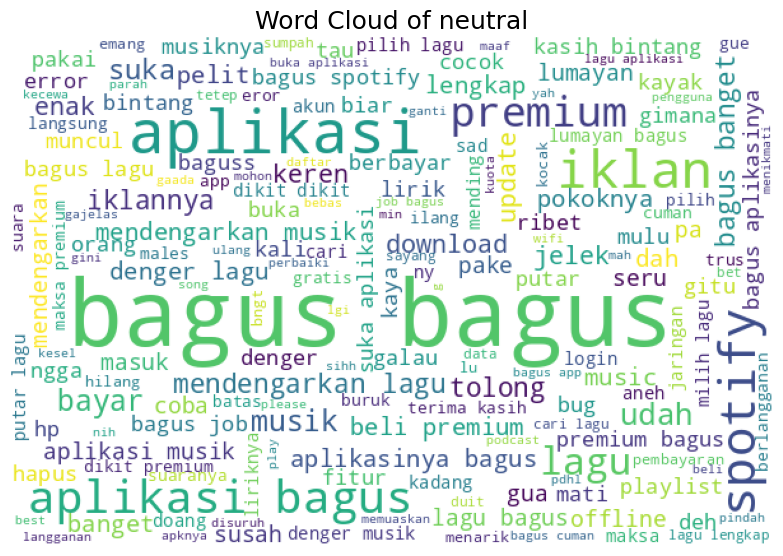

In [93]:
# melihat worldcloud netral
# Membuat dataframe untuk wordcloud netral
pd.set_option('display.max_colwidth', 3000)

neutral = clean_df[clean_df['polarity'] == 'neutral']
neutral = neutral[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
neutral = neutral.sort_values(by='polarity_score', ascending=False)
neutral = neutral.reset_index(drop=True)
neutral.index += 1

# Menampilkan wordcloud untuk label netral
list_words = ''

for spotify in neutral['text_stopword']:
    for word in spotify:
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of neutral', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')

plt.show()

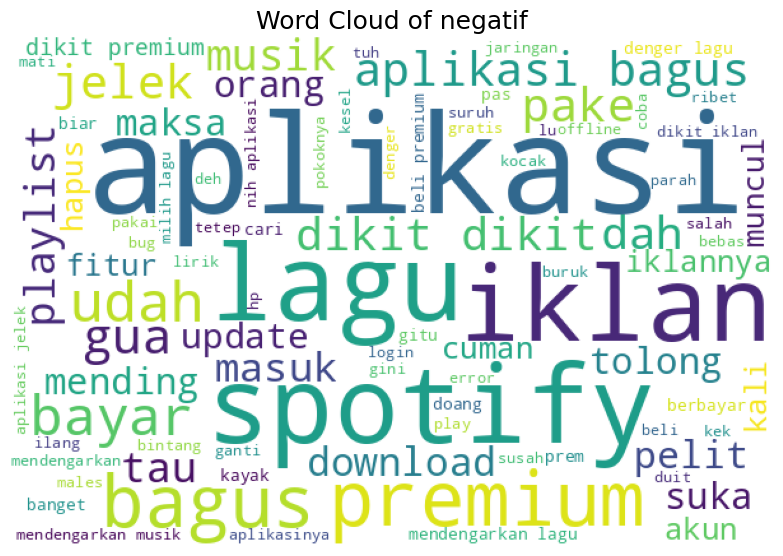

In [94]:
# melihat worldcloud negatif
# Membuat dataframe untuk wordcloud negatif
pd.set_option('display.max_colwidth', 3000)

negative = clean_df[clean_df['polarity'] == 'negative']
negative = negative[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
negative= negative.sort_values(by='polarity_score', ascending=False)
negative = negative.reset_index(drop=True)
negative.index += 1

# Menampilkan wordcloud untuk label negatif
list_words = ''

for spotify in negative['text_stopword']:
    for word in spotify:
        list_words += ' ' + (word)

wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of negatif', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')

plt.show()

**Insight :**

Pelabelan ini digunakan untuk memberi kategori atau label berdasarkan informasi yang tersedia

Hasil wordcloud

### 📌 **1. WordCloud Menyeluruh**
- **Kata dominan:** `spotify`, `iklan`, `premium`
- **Kesimpulan:**  
  Mayoritas pengguna menyebut langsung nama aplikasi (*Spotify*) dan menunjukkan perhatian besar pada dua aspek utama, iklan dan fitur premium. Artinya, isu terkait iklan dan minat terhadap layanan premium cukup dominan dalam ulasan.

### 😊 **2. WordCloud Sentimen Positif**
- **Kata dominan:** `spotify`, `lagu`, `premium`
- **Kesimpulan:**  
  Pengguna yang memberi ulasan positif umumnya puas dengan koleksi lagu dan merasa premium memberikan pengalaman yang lebih baik. Ini menunjukkan bahwa pengalaman mendengarkan musik sangat dihargai, terutama bila menggunakan versi berbayar.

### 😐 **3. WordCloud Sentimen Netral**
- **Kata dominan:** `bagus`, `aplikasi`, `spotify`
- **Kesimpulan:**  
  Ulasan netral cenderung bersifat umum dan tidak terlalu kritis. Kata seperti “bagus” menunjukkan pengalaman cukup baik. Kata “aplikasi” menunjukkan mereka fokus menilai aspek teknis/fungsional.


### 😠 **4. WordCloud Sentimen Negatif**
- **Kata dominan:** `aplikasi`, `lagu`, `iklan`
- **Kesimpulan:**  
  Ulasan negatif berkaitan dengan iklan yang mengganggu, masalah pada lagu (mungkin terkait ketersediaan atau kualitas), serta **aplikasi** itu sendiri.


# Modelling

In [95]:
# mengambil kolom text_akhir dan polarity
X = clean_df['text_akhir']
y = clean_df['polarity']

In [96]:
# Tokenisasi
max_features = 2500
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(X.values)
X = tokenizer.texts_to_sequences(X.values)
X = pad_sequences(X)

# Label encoding
labelencoder = LabelEncoder()
integer_encoded = labelencoder.fit_transform(y)
y = to_categorical(integer_encoded)

# Menentukan jumlah kelas
num_classes = y.shape[1]

In [97]:
# melakukan callback yang akan berhenti jika akurasi >0.92
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') > 0.92:
            print(f"\nVal accuracy telah melebihi 0.92, menghentikan pelatihan pada epoch {epoch+1}")
            self.model.stop_training = True
early_stopping = CustomCallback()

**1. Model Machine Learning Klasik (SVM)**

In [119]:
# menggunakan algoritma SVM
# menggunakan algoritma klasik, svm
# Split data (train : 80, test : 20)
X_train, X_test, y_train, y_test = train_test_split(clean_df['text_akhir'], clean_df['polarity'], test_size=0.2, random_state=42) # Changed 'df' to 'clean_df' and used the appropriate columns

# TF-IDF + SVM
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,5), max_features=15000)),
    ('clf', LinearSVC())
])

# Training
svm_pipeline.fit(X_train, y_train)

# Evaluasi
y_pred_train = svm_pipeline.predict(X_train)
y_pred_test = svm_pipeline.predict(X_test)

print("Akurasi Train:", accuracy_score(y_train, y_pred_train))
print("Akurasi Test:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report (Test):\n", classification_report(y_test, y_pred_test))

Akurasi Train: 0.9893333333333333
Akurasi Test: 0.9031666666666667

Classification Report (Test):
               precision    recall  f1-score   support

    negative       0.55      0.21      0.31       225
     neutral       0.86      0.86      0.86      2101
    positive       0.93      0.97      0.95      3674

    accuracy                           0.90      6000
   macro avg       0.78      0.68      0.71      6000
weighted avg       0.89      0.90      0.90      6000



In [99]:
# simpan model
joblib.dump(svm_pipeline, 'model_svm.pkl')

['model_svm.pkl']

**2. Model LSTM**

In [100]:
# Menggunakan model LSTM
# pishkan data train dan test
# test : 10, val : 20, dan train : 70
X_train_val, X_test_LSTM, y_train_val, y_test_LSTM = train_test_split(X, y, test_size=0.1, random_state=42)

X_train_LSTM, X_val_LSTM, y_train_LSTM, y_val_LSTM = train_test_split(X_train_val, y_train_val, test_size=2/9, random_state=42)

In [101]:
# pemodelan LSTM
model_LSTM = Sequential()
model_LSTM.add(Embedding(max_features, 256, input_length=X.shape[1]))
model_LSTM.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01), return_sequences=True))
model_LSTM.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01)))
model_LSTM.add(Dense(128, activation='relu'))
model_LSTM.add(Dense(64, activation='relu'))
model_LSTM.add(Dense(num_classes, activation='softmax'))
model_LSTM.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Menggunakan early stopping
batch_size = 2056
history_LSTM = model_LSTM.fit(X_train_LSTM, y_train_LSTM, epochs=50, batch_size=batch_size, verbose=2, callbacks=[early_stopping], validation_data=(X_val_LSTM, y_val_LSTM))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


11/11 - 13s - 1s/step - accuracy: 0.6115 - loss: 5.3266 - val_accuracy: 0.6237 - val_loss: 4.4161
Epoch 2/50
11/11 - 10s - 873ms/step - accuracy: 0.6249 - loss: 3.8932 - val_accuracy: 0.6237 - val_loss: 3.2501
Epoch 3/50
11/11 - 9s - 797ms/step - accuracy: 0.6249 - loss: 2.8837 - val_accuracy: 0.6237 - val_loss: 2.4220
Epoch 4/50
11/11 - 6s - 519ms/step - accuracy: 0.6249 - loss: 2.1674 - val_accuracy: 0.6237 - val_loss: 1.8425
Epoch 5/50
11/11 - 4s - 396ms/step - accuracy: 0.6255 - loss: 1.6607 - val_accuracy: 0.6808 - val_loss: 1.4009
Epoch 6/50
11/11 - 7s - 609ms/step - accuracy: 0.7356 - loss: 1.2222 - val_accuracy: 0.8118 - val_loss: 0.9685
Epoch 7/50
11/11 - 10s - 896ms/step - accuracy: 0.8302 - loss: 0.8714 - val_accuracy: 0.8488 - val_loss: 0.7298
Epoch 8/50
11/11 - 9s - 824ms/step - accuracy: 0.8617 - loss: 0.6673 - val_accuracy: 0.8778 - val_loss: 0.5700
Epoch 9/50
11/11 - 6s - 549ms/step - accuracy: 0.8861 - loss: 0.5194 - val_accuracy: 0.8933 - val_loss: 0.4567
Epoch 10/50


In [102]:
# Evaluasi model
score_LSTM, acc_LSTM = model_LSTM.evaluate(X_test_LSTM, y_test_LSTM, verbose=2)
print("Test score: %.2f" % (score_LSTM))
print("Test accuracy: %.2f" % (acc_LSTM))

94/94 - 6s - 60ms/step - accuracy: 0.9133 - loss: 0.3118
Test score: 0.31
Test accuracy: 0.91


In [104]:
# simpan model pelatihan
model_LSTM.save('model_LSTM.h5')

**3. Model CNN**

In [105]:
# Menggunakan model CNN
# Memisahkan data train dan test
# train: 80, val : 10, test:10
X_train_val, X_test_CNN, y_train_val, y_test_CNN = train_test_split(X, y, test_size=0.1, random_state=42)

X_train_CNN, X_val_CNN, y_train_CNN, y_val_CNN = train_test_split(X_train_val, y_train_val, test_size=1/9, random_state=42)

In [106]:
# Model CNN
model_CNN = Sequential()
model_CNN.add(Embedding(input_dim=max_features, output_dim=128, input_length=X.shape[1]))
model_CNN.add(Dropout(0.3))
model_CNN.add(Conv1D(filters=128, kernel_size=5, activation='relu', kernel_regularizer=l2(0.001)))
model_CNN.add(GlobalMaxPooling1D())
model_CNN.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model_CNN.add(Dropout(0.5))
model_CNN.add(Dense(num_classes, activation='softmax'))

# compile model
optimizer = Adam(learning_rate=0.0005)
model_CNN.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training
history_CNN = model_CNN.fit(
    X_train_CNN, y_train_CNN,
    epochs=50,
    batch_size=512,
    validation_data=(X_val_CNN, y_val_CNN),
    callbacks=[early_stopping],
    verbose=2
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


47/47 - 13s - 275ms/step - accuracy: 0.6051 - loss: 1.0149 - val_accuracy: 0.7957 - val_loss: 0.9087
Epoch 2/50
47/47 - 10s - 209ms/step - accuracy: 0.7538 - loss: 0.7794 - val_accuracy: 0.8007 - val_loss: 0.6655
Epoch 3/50
47/47 - 1s - 24ms/step - accuracy: 0.8120 - loss: 0.5942 - val_accuracy: 0.8513 - val_loss: 0.5066
Epoch 4/50
47/47 - 1s - 12ms/step - accuracy: 0.8552 - loss: 0.4686 - val_accuracy: 0.8813 - val_loss: 0.4120
Epoch 5/50
47/47 - 1s - 13ms/step - accuracy: 0.8891 - loss: 0.3849 - val_accuracy: 0.8980 - val_loss: 0.3593
Epoch 6/50
47/47 - 0s - 9ms/step - accuracy: 0.9142 - loss: 0.3287 - val_accuracy: 0.9060 - val_loss: 0.3257
Epoch 7/50
47/47 - 1s - 14ms/step - accuracy: 0.9252 - loss: 0.2927 - val_accuracy: 0.9113 - val_loss: 0.3052
Epoch 8/50
47/47 - 0s - 9ms/step - accuracy: 0.9349 - loss: 0.2641 - val_accuracy: 0.9197 - val_loss: 0.2869
Epoch 9/50
47/47 - 0s - 9ms/step - accuracy: 0.9438 - loss: 0.2461 - val_accuracy: 0.9257 - val_loss: 0.2757
Epoch 10/50
47/47 - 

In [107]:
# evaluasi model
score_CNN, acc_CNN = model_CNN.evaluate(X_test_CNN, y_test_CNN, verbose=2,batch_size=1028)
print("Test score: %.2f" % (score_CNN))
print("Test accuracy: %.2f" % (acc_CNN))

3/3 - 1s - 465ms/step - accuracy: 0.9347 - loss: 0.2439
Test score: 0.24
Test accuracy: 0.93


In [108]:
# simpan model pelatihan
model_CNN.save('model_CNN.h5')

**4. Model GRU**

In [109]:
# menggunakan model GRU
# pisahkan data
# train: 90, val: 5, test: 5
X_train_val, X_test_GRU, y_train_val, y_test_GRU = train_test_split(X, y, test_size=0.05, random_state=42)
X_train_GRU, X_val_GRU, y_train_GRU, y_val_GRU = train_test_split(X_train_val, y_train_val, test_size=0.0526, random_state=42)

In [110]:
# Pemodelan GRU
model_GRU = Sequential()
model_GRU.add(Embedding(max_features, 512, input_length=X.shape[1]))
model_GRU.add(SpatialDropout1D(0.3))
model_GRU.add(Bidirectional(GRU(64, return_sequences=True)))
model_GRU.add(Bidirectional(GRU(128, return_sequences=False)))
model_GRU.add(Dense(128, activation='relu',kernel_regularizer=l2(0.01)))
model_GRU.add(Dropout(0.5))
model_GRU.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model_GRU.add(Dropout(0.5))
model_GRU.add(Dense(num_classes, activation='softmax'))
model_GRU.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Menggunakan early stopping
batch_size = 1028
history_GRU = model_GRU.fit(X_train_GRU, y_train_GRU, epochs=15, batch_size=batch_size, verbose=2, validation_data=(X_val_GRU, y_val_GRU),callbacks=[early_stopping])

Epoch 1/15
27/27 - 9s - 327ms/step - accuracy: 0.6638 - loss: 2.7410 - val_accuracy: 0.8120 - val_loss: 1.9177
Epoch 2/15
27/27 - 4s - 166ms/step - accuracy: 0.8514 - loss: 1.5459 - val_accuracy: 0.8633 - val_loss: 1.1558
Epoch 3/15
27/27 - 5s - 189ms/step - accuracy: 0.9076 - loss: 0.9051 - val_accuracy: 0.9160 - val_loss: 0.6845
Epoch 4/15
27/27 - 5s - 186ms/step - accuracy: 0.9402 - loss: 0.5475 - val_accuracy: 0.9333 - val_loss: 0.4676
Epoch 5/15
27/27 - 3s - 105ms/step - accuracy: 0.9573 - loss: 0.3584 - val_accuracy: 0.9420 - val_loss: 0.3488
Epoch 6/15
27/27 - 3s - 100ms/step - accuracy: 0.9661 - loss: 0.2556 - val_accuracy: 0.9433 - val_loss: 0.2840
Epoch 7/15
27/27 - 5s - 192ms/step - accuracy: 0.9727 - loss: 0.1922 - val_accuracy: 0.9360 - val_loss: 0.2950
Epoch 8/15
27/27 - 5s - 193ms/step - accuracy: 0.9763 - loss: 0.1589 - val_accuracy: 0.9347 - val_loss: 0.2711
Epoch 9/15
27/27 - 5s - 187ms/step - accuracy: 0.9779 - loss: 0.1381 - val_accuracy: 0.9467 - val_loss: 0.2329
E

In [111]:
# evaluasi model
score_GRU, acc_GRU = model_GRU.evaluate(X_test_GRU, y_test_GRU, verbose=2)
print("Test score: %.2f" % (score_GRU))
print("Test accuracy: %.2f" % (acc_GRU))

47/47 - 0s - 10ms/step - accuracy: 0.9460 - loss: 0.2133
Test score: 0.21
Test accuracy: 0.95


In [112]:
# simpan model pelatihan
model_GRU.save('model_GRU.h5')

📊 Tabel Evaluasi Model

| No. | Model                     | Akurasi Train | Akurasi Test |
|-----|---------------------------|---------------|--------------|
| 1   | SVM    | 98%        | 90%       |
| 2   | LSTM             | 92%        | 92%       |
| 3   | CNN          | 97%        | 93%       |
| 4   | GRU       | 98%        | 95%       |

Dengan demikian, dapat dihasilkan bahwa model GRU adalah model terbaik yang memiliki akurasi tes tertinggi, di ikuti oleh CNN, LSTM, dan SVM.

# Melakukan Interface Model

In [127]:
# melakukan interface pada model (LSTM, CNN, GRU)
new_texts = [
    "Aplikasi ini sangat membantu dan bagus sekali!",
    "Biasa aja, nggak terlalu menarik menurutku.",
    "Fiturnya banyak yang error dan susah digunakan.",
    "Pelayanannya cepat dan tampilannya menarik banget."
]

# Nilai asli dari teks
true_labels = ["positive", "negative", "neutral"]
# Tokenisasi teks baru
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_padded_sequences = pad_sequences(new_sequences, maxlen=X.shape[1])

# Membuat prediksi
predictions_LSTM = model_LSTM.predict(new_padded_sequences)
predictions_CNN = model_CNN.predict(new_padded_sequences)
predictions_GRU = model_GRU.predict(new_padded_sequences)

# Mengubah prediksi menjadi label
predicted_labels_LSTM = np.argmax(predictions_LSTM, axis=1)
predicted_labels_CNN = np.argmax(predictions_CNN, axis=1)
predicted_labels_GRU = np.argmax(predictions_GRU, axis=1)

predicted_labels_LSTM = labelencoder.inverse_transform(predicted_labels_LSTM)
predicted_labels_CNN = labelencoder.inverse_transform(predicted_labels_CNN)
predicted_labels_GRU = labelencoder.inverse_transform(predicted_labels_GRU)

# Menampilkan hasil prediksi
for text, true_label, label_LSTM, label_CNN, label_GRU in zip(new_texts, true_labels, predicted_labels_LSTM, predicted_labels_CNN, predicted_labels_GRU):
    print(f"Text: {text}\nTrue Label: {true_label}\nPredicted Label (LSTM): {label_LSTM}\nPredicted Label (CNN): {label_CNN}\nPredicted Label (GRU): {label_GRU}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Text: Aplikasi ini sangat membantu dan bagus sekali!
True Label: positive
Predicted Label (LSTM): neutral
Predicted Label (CNN): neutral
Predicted Label (GRU): neutral

Text: Biasa aja, nggak terlalu menarik menurutku.
True Label: negative
Predicted Label (LSTM): positive
Predicted Label (CNN): positive
Predicted Label (GRU): neutral

Text: Fiturnya banyak yang error dan susah digunakan.
True Label: neutral
Predicted Label (LSTM): neutral
Predicted Label (CNN): neutral
Predicted Label (GRU): neutral



## Membuat file requirements otomatis


In [128]:
!pip freeze > requirements.txt